## Aplikasi Pendeteksi Penyakit Tanaman

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import optimizers, losses
import csv
import shutil
import random

In [ ]:
### JGN DIUBAH-DIUBAH

# final_size = 2434
# val_test_size = 125


# dir_potato = "/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Early blight"
# dir_potato = "/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Healthy"
# dir_potato = "/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Late blight"


# images = os.listdir(dir_potato)

# random_values = random.sample(images, val_test_size)

# for i in random_values : 
#   src_file = os.path.join(dir_potato, i)
#   if os.path.isfile(src_file):
#       shutil.move(src_file, "/content/drive/Shareddrives/Dataset Tanaman/type/valid/Potato")

# # os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/type/test/Corn")
# # os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/type/test/Tomato")
# # os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/type/test/Potato")

# # os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/type/valid/Corn")
# # os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/type/valid/Tomato")
# # os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/type/valid/Potato")

# # for i in images : 
# #     if i not in random_values :
# #       path = os.path.join(dir_corn, i)
# #       os.remove(path)
    
    


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-923ef63234b1>", line 12, in <cell line: 12>
    images = os.listdir(dir_potato)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultra

TypeError: ignored

In [ ]:
dir_train_apple_br = "/content/drive/Shareddrives/Dataset Tanaman/Apple/train/Apple Black rot"
dir_train_apple_h = "/content/drive/Shareddrives/Dataset Tanaman/Apple/train/Apple Healthy"
dir_train_apple_s = "/content/drive/Shareddrives/Dataset Tanaman/Apple/train/Apple Scab"
dir_train_apple_r = "/content/drive/Shareddrives/Dataset Tanaman/Apple/train/Cedar apple rust"

dir_test_apple_br = "/content/drive/Shareddrives/Dataset Tanaman/Apple/test/Apple Black rot"
dir_test_apple_h = "/content/drive/Shareddrives/Dataset Tanaman/Apple/test/Apple Healthy"
dir_test_apple_s = "/content/drive/Shareddrives/Dataset Tanaman/Apple/test/Apple Scab"
dir_test_apple_r = "/content/drive/Shareddrives/Dataset Tanaman/Apple/test/Cedar apple rust"

dir_val_apple_br = "/content/drive/Shareddrives/Dataset Tanaman/Apple/valid/Apple Black rot"
dir_val_apple_h = "/content/drive/Shareddrives/Dataset Tanaman/Apple/valid/Apple Healthy"
dir_val_apple_s = "/content/drive/Shareddrives/Dataset Tanaman/Apple/valid/Apple Scab"
dir_val_apple_r = "/content/drive/Shareddrives/Dataset Tanaman/Apple/valid/Cedar apple rust"

# os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/Apple/test/Apple Black rot")

# os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/Apple/test/Apple Healthy")

# os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/Apple/test/Apple Scab")

# os.makedirs("/content/drive/Shareddrives/Dataset Tanaman/Apple/test/Cedar apple rust")

images = os.listdir(dir_train_apple_br)

print(len(images))

images = os.listdir(dir_train_apple_h)

print(len(images))

images = os.listdir(dir_train_apple_s)

print(len(images))

images = os.listdir(dir_train_apple_r)

print(len(images))

# val_test_size = 256

# random_values = random.sample(images, val_test_size)

# for i in random_values : 
#   src_file = os.path.join(dir_train_apple_r, i)
#   if os.path.isfile(src_file):
#       shutil.move(src_file, dir_val_apple_r)

2055
2055
2055
2055


In [ ]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

In [ ]:


def analyze_image(base_dir) :
    sample_image  = load_img(f"{os.path.join(base_dir, os.listdir(base_dir)[0])}")
    plt.imshow(sample_image)
    plt.show()  

    sample_array = img_to_array(sample_image)

    print(sample_array)

    print(f"Each image has shape: {sample_array.shape}")

    print(f"The maximum pixel value used is: {np.max(sample_array)}")

    resized_image = tf.image.resize(sample_image, IMAGE_SIZE)
    flat_image = tf.reshape(resized_image, [-1])

    print(f"Each image has shape: {flat_image.shape}")
    print(f"The maximum pixel value used is: {np.max(flat_image)}")

    print(flat_image.numpy())
    print(flat_image.numpy().shape)

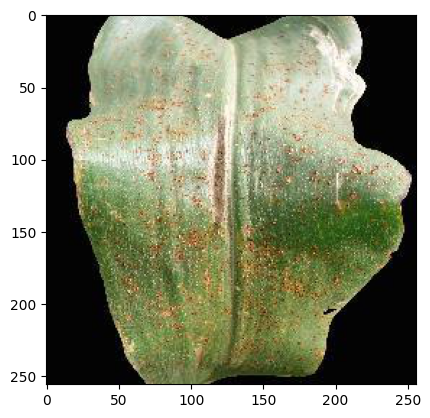

[[[3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]
  ...
  [3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]]

 [[3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]
  ...
  [3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]]

 [[3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]
  ...
  [3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]]

 ...

 [[3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]
  ...
  [3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]]

 [[3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]
  ...
  [3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]]

 [[3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]
  ...
  [3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]]]
Each image has shape: (256, 256, 3)
The maximum pixel value used is: 255.0
Each image has shape: (67500,)
The maximum pixel value used is: 255.0
[3. 3. 3. ... 3. 3. 3.]
(67500,)


In [ ]:
analyze_image("/content/drive/Shareddrives/Dataset Tanaman/Corn/train/Corn Common rust")

In [ ]:


# create an ImageDataGenerator object to load the images from directories
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# load the images from the directories
train_data = datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Corn/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Corn/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 10708 images belonging to 4 classes.
Found 1336 images belonging to 4 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90) and (logs.get('loss')<0.2)and (logs.get('accuracy') <logs.get('val_accuracy') ):
      print("\nReached above 90% accuracy and under 20% loss so cancelling training!")
      self.model.stop_training = True

In [ ]:
def create_model():

  ### START CODE HERE       

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
  ])
  

  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
# Save your model
model = create_model()
callbacks = myCallback()

# Train your model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/15
334/334 [==============================] - 3531s 11s/step - loss: 0.4442 - accuracy: 0.8141 - val_loss: 0.4198 - val_accuracy: 0.8744
Epoch 2/15
334/334 [==============================] - 766s 2s/step - loss: 0.2063 - accuracy: 0.9224 - val_loss: 0.2463 - val_accuracy: 0.9224
Epoch 3/15
334/334 [==============================] - 769s 2s/step - loss: 0.1398 - accuracy: 0.9484 - val_loss: 0.1783 - val_accuracy: 0.9460
Epoch 4/15
334/334 [==============================] - 778s 2s/step - loss: 0.1013 - accuracy: 0.9629 - val_loss: 0.1357 - val_accuracy: 0.9663
Epoch 5/15
334/334 [==============================] - ETA: 0s - loss: 0.0793 - accuracy: 0.9720
Reached above 90% accuracy and under 10% loss so cancelling training!
334/334 [==============================] - 766s 2s/step - loss: 0.0793 - accuracy: 0.9720 - val_loss: 0.1869 - val_accuracy: 0.9573


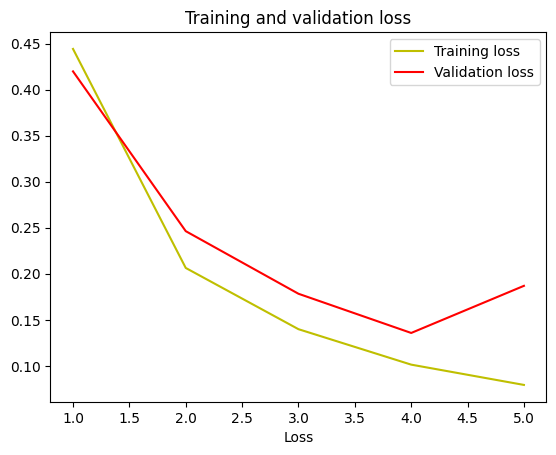

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

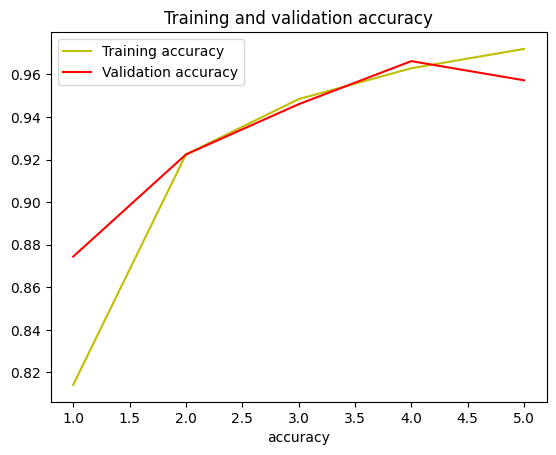

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('model_corn.h5')

In [ ]:
images = os.listdir('/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Healthy')

print(images)

class_name = ["common rust", "gray leaf spot", "corn healthy", "northern leaf blight"]

for i in images:
 print()
 # predicting images
 path = '/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Healthy/' + i
 img = load_img(path, target_size=(150, 150))
 x = img_to_array(img)
 x /= 255
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)

 
 print(classes[0])

 # Get the index of the class with the highest probability
 predicted_class_index = np.argmax(classes[0])

# Get the name of the predicted class
 predicted_class_name = class_name[predicted_class_index]

# Print the predicted class name
 print("Predicted class:", predicted_class_name)

['CornHealthy(1).JPG', 'CornHealthy(2).JPG']

1/1 [==============================] - 0s 64ms/step
[0.00605798 0.02125425 0.9437167  0.02897112]
Predicted class: corn healthy

1/1 [==============================] - 0s 177ms/step
[4.9987384e-06 4.3533382e-06 9.9984038e-01 1.5030135e-04]
Predicted class: corn healthy


**Modeling corn 2**

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

# load the images from the directories
train_data = datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Corn/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

testing_data = testing_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Corn/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

  # Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Corn/valid',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 10708 images belonging to 4 classes.
Found 1336 images belonging to 4 classes.
Found 1336 images belonging to 4 classes.


In [ ]:
def create_model():

  ### START CODE HERE       

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
  ])
  

  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
# Save your model
model = create_model()
callbacks = myCallback()

# Train your model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=testing_data,
                    callbacks=[callbacks])

Epoch 1/15
335/335 [==============================] - 3074s 9s/step - loss: 0.4797 - accuracy: 0.8075 - val_loss: 0.3353 - val_accuracy: 0.8728
Epoch 2/15
335/335 [==============================] - 1149s 3s/step - loss: 0.3128 - accuracy: 0.8803 - val_loss: 0.3438 - val_accuracy: 0.8675
Epoch 3/15
335/335 [==============================] - 1142s 3s/step - loss: 0.2862 - accuracy: 0.8893 - val_loss: 0.2477 - val_accuracy: 0.9147
Epoch 4/15
335/335 [==============================] - 1138s 3s/step - loss: 0.2918 - accuracy: 0.8853 - val_loss: 0.2722 - val_accuracy: 0.9004
Epoch 5/15
335/335 [==============================] - 1136s 3s/step - loss: 0.2697 - accuracy: 0.8987 - val_loss: 0.2683 - val_accuracy: 0.8945
Epoch 6/15
335/335 [==============================] - 1131s 3s/step - loss: 0.2510 - accuracy: 0.9002 - val_loss: 0.2354 - val_accuracy: 0.9169
Epoch 7/15
335/335 [==============================] - 1125s 3s/step - loss: 0.2252 - accuracy: 0.9119 - val_loss: 0.2836 - val_accuracy:

In [ ]:
model.save('model_corn_2.h5')

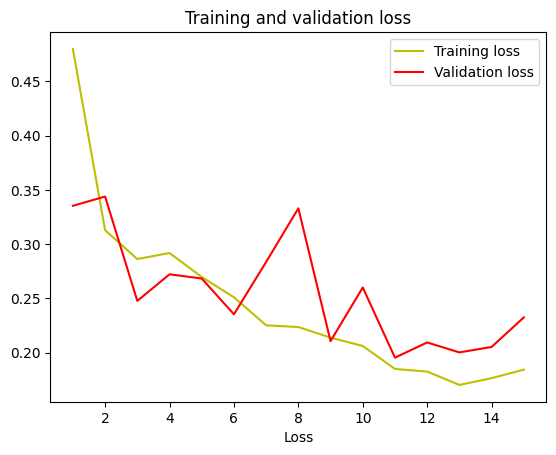

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

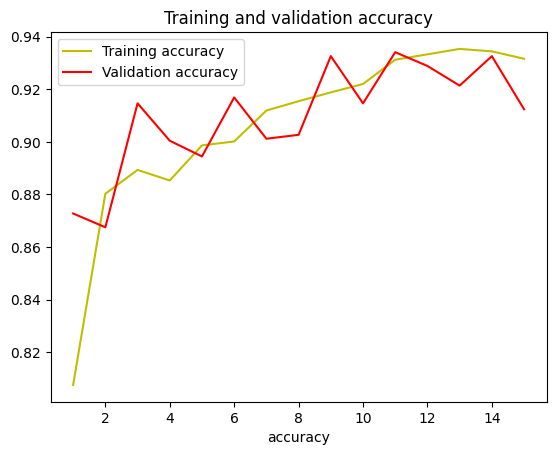

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [ ]:
class_name = ["common rust", "gray leaf spot", "corn healthy", "northern leaf blight"]


In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Common rust", "common rust", class_name)

1/1 [==============================] - 0s 242ms/step
[1.0000000e+00 3.1797842e-10 1.4987826e-27 2.3403842e-15]
Predicted class: common rust
1/1 [==============================] - 0s 65ms/step
[9.9994779e-01 5.2169566e-05 3.4448079e-13 3.5193253e-08]
Predicted class: common rust
1/1 [==============================] - 0s 70ms/step
[9.9999976e-01 1.3587062e-07 8.6968161e-13 1.3959155e-07]
Predicted class: common rust
1/1 [==============================] - 0s 65ms/step
[1.0000000e+00 8.1832985e-10 1.8731308e-26 7.9846191e-14]
Predicted class: common rust
1/1 [==============================] - 0s 106ms/step
[5.1980132e-01 4.3863717e-01 2.2145208e-15 4.1561551e-02]
Predicted class: common rust
1/1 [==============================] - 0s 93ms/step
[9.9542123e-01 4.5786160e-03 2.4587766e-11 8.2446249e-08]
Predicted class: common rust
1/1 [==============================] - 0s 85ms/step
[9.9997020e-01 2.6626238e-05 1.8502444e-10 3.2444048e-06]
Predicted class: common rust
1/1 [====================

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Gray leaf spot", "gray leaf spot", class_name)

1/1 [==============================] - 0s 74ms/step
[3.0470967e-01 1.7489932e-01 1.9916977e-05 5.2037102e-01]
Predicted class: northern leaf blight
1/1 [==============================] - 0s 63ms/step
[2.5638542e-03 9.5584720e-01 2.6610066e-06 4.1586228e-02]
Predicted class: gray leaf spot
1/1 [==============================] - 0s 70ms/step
[3.30975489e-03 9.56280589e-01 1.02800996e-07 4.04094905e-02]
Predicted class: gray leaf spot
1/1 [==============================] - 0s 56ms/step
[5.0731123e-05 6.5270230e-02 4.6869804e-08 9.3467897e-01]
Predicted class: northern leaf blight
1/1 [==============================] - 0s 59ms/step
[1.0925137e-02 9.8652738e-01 1.3303982e-06 2.5462559e-03]
Predicted class: gray leaf spot
1/1 [==============================] - 0s 58ms/step
[2.7617163e-03 9.9723238e-01 3.1834538e-11 5.9503714e-06]
Predicted class: gray leaf spot
1/1 [==============================] - 0s 65ms/step
[5.4866185e-05 9.9941111e-01 1.2847885e-10 5.3393800e-04]
Predicted class: gray 

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Healthy", "corn healthy", class_name)

1/1 [==============================] - 0s 78ms/step
[6.5784101e-05 2.0349066e-04 9.9901330e-01 7.1742950e-04]
Predicted class: corn healthy
1/1 [==============================] - 0s 58ms/step
[3.5764111e-07 1.1215968e-06 9.9999511e-01 3.4903353e-06]
Predicted class: corn healthy
1/1 [==============================] - 0s 60ms/step
[1.6517162e-05 2.9419989e-05 9.9979955e-01 1.5457280e-04]
Predicted class: corn healthy
1/1 [==============================] - 0s 61ms/step
[5.7868295e-08 1.4084000e-07 9.9999821e-01 1.5800409e-06]
Predicted class: corn healthy
1/1 [==============================] - 0s 65ms/step
[1.4718081e-07 3.0628081e-07 9.9999583e-01 3.6397478e-06]
Predicted class: corn healthy
1/1 [==============================] - 0s 62ms/step
[2.2021099e-05 2.1264832e-05 9.9980670e-01 1.5007156e-04]
Predicted class: corn healthy
1/1 [==============================] - 0s 59ms/step
[5.6139243e-07 1.2514747e-06 9.9998808e-01 1.0075642e-05]
Predicted class: corn healthy
1/1 [===============

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Northern Leaf Blight", "northern leaf blight", class_name)

1/1 [==============================] - 0s 124ms/step
[1.4214711e-02 9.5773649e-01 3.6572012e-06 2.8045069e-02]
Predicted class: gray leaf spot
1/1 [==============================] - 0s 92ms/step
[5.0859813e-07 8.7257984e-05 1.6129059e-14 9.9991226e-01]
Predicted class: northern leaf blight
1/1 [==============================] - 0s 108ms/step
[9.0522277e-05 3.3306900e-02 1.1057135e-07 9.6660244e-01]
Predicted class: northern leaf blight
1/1 [==============================] - 0s 65ms/step
[1.0827626e-02 1.3140249e-01 3.3014189e-04 8.5743970e-01]
Predicted class: northern leaf blight
1/1 [==============================] - 0s 62ms/step
[7.0945561e-02 4.9291784e-01 4.5831007e-06 4.3613195e-01]
Predicted class: gray leaf spot
1/1 [==============================] - 0s 59ms/step
[3.5497840e-05 1.6248213e-02 1.1967502e-08 9.8371625e-01]
Predicted class: northern leaf blight
1/1 [==============================] - 0s 57ms/step
[9.7746147e-07 2.4273500e-02 4.6740639e-11 9.7572553e-01]
Predicted cl

# Modeling Potato

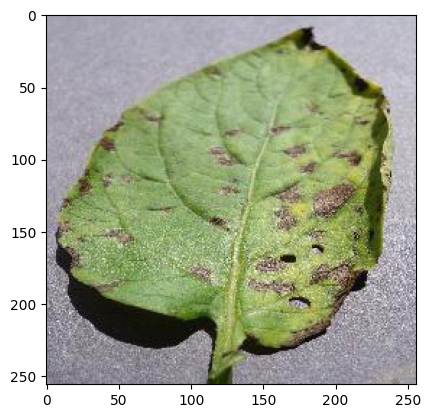

[[[166. 164. 178.]
  [166. 164. 178.]
  [165. 163. 177.]
  ...
  [187. 187. 199.]
  [184. 184. 196.]
  [182. 182. 194.]]

 [[165. 163. 177.]
  [164. 162. 176.]
  [164. 162. 176.]
  ...
  [188. 188. 200.]
  [185. 185. 197.]
  [184. 184. 196.]]

 [[164. 162. 176.]
  [163. 161. 175.]
  [163. 161. 175.]
  ...
  [190. 190. 202.]
  [189. 189. 201.]
  [188. 188. 200.]]

 ...

 [[121. 117. 131.]
  [147. 143. 157.]
  [137. 133. 147.]
  ...
  [160. 155. 162.]
  [160. 155. 162.]
  [161. 156. 163.]]

 [[129. 125. 139.]
  [150. 146. 160.]
  [141. 137. 151.]
  ...
  [152. 146. 156.]
  [155. 149. 159.]
  [159. 153. 163.]]

 [[147. 143. 157.]
  [161. 157. 171.]
  [150. 146. 160.]
  ...
  [154. 148. 158.]
  [158. 152. 162.]
  [164. 158. 168.]]]
Each image has shape: (256, 256, 3)
The maximum pixel value used is: 255.0
Each image has shape: (67500,)
The maximum pixel value used is: 250.94371032714844
[165.52182 163.52182 177.52182 ... 160.36304 154.36304 164.36304]
(67500,)


In [ ]:
analyze_image("/content/drive/Shareddrives/Dataset Tanaman/Potato/train/Potato Early blight")

In [ ]:
# create an ImageDataGenerator object to load the images from directories
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# load the images from the directories
train_data = datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Potato/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Potato/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 7589 images belonging to 3 classes.
Found 1896 images belonging to 3 classes.


In [ ]:
def create_model_potato():

  ### START CODE HERE       

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 3 classes
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  

  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
# Save your model
model = create_model_potato()
callbacks = myCallback()

# Train your model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/15
  1/183 [..............................] - ETA: 20:12 - loss: 1.1159 - accuracy: 0.3438

KeyboardInterrupt: ignored

In [ ]:
model.save('model_potato.h5')

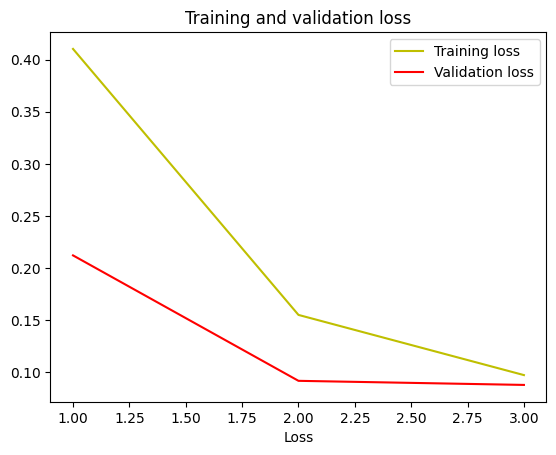

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

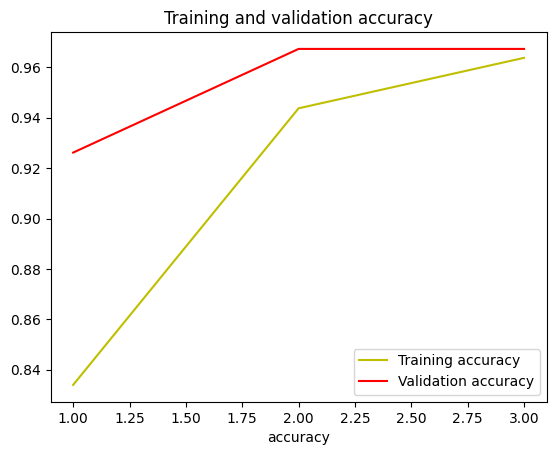

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [ ]:
images = os.listdir('/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Early blight')

print(images)

class_name = ["early blight", "healthy", "late blight"]

for i in images:
 print()
 # predicting images
 path = '/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Early blight/' + i
 img = load_img(path, target_size=(150, 150))
 x = img_to_array(img)
 x /= 255
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)

 
 print(classes[0])

 # Get the index of the class with the highest probability
 predicted_class_index = np.argmax(classes[0])

# Get the name of the predicted class
 predicted_class_name = class_name[predicted_class_index]

# Print the predicted class name
 print("Predicted class:", predicted_class_name)

['PotatoEarlyBlight(10).JPG', 'PotatoEarlyBlight(6).jpg', 'PotatoEarlyBlight(1).jpg', 'PotatoEarlyBlight(2).jpg', 'PotatoEarlyBlight(11).JPG', 'PotatoEarlyBlight(4).jpg', 'PotatoEarlyBlight(9).JPG', 'PotatoEarlyBlight(8).JPG', 'PotatoEarlyBlight(3).jpg', 'PotatoEarlyBlight(5).jpg', 'PotatoEarlyBlight(12).JPG', 'PotatoEarlyBlight(7).jpg', 'PotatoEarlyBlight(13).jpg']

1/1 [==============================] - 0s 35ms/step
[0.5634707  0.13088164 0.30564767]
Predicted class: early blight

1/1 [==============================] - 0s 29ms/step
[0.4195445  0.00204305 0.5784124 ]
Predicted class: late blight

1/1 [==============================] - 0s 32ms/step
[0.24054797 0.11984467 0.63960737]
Predicted class: late blight

1/1 [==============================] - 0s 31ms/step
[1.1058812e-01 1.3416875e-04 8.8927770e-01]
Predicted class: late blight

1/1 [==============================] - 0s 38ms/step
[9.9998653e-01 9.0564743e-07 1.2467144e-05]
Predicted class: early blight

1/1 [====================

# Model Potato 2

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

# load the images from the directories
train_data = datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Potato/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

testing_data = testing_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Potato/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

  # Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Potato/valid',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 5844 images belonging to 3 classes.
Found 729 images belonging to 3 classes.
Found 729 images belonging to 3 classes.


In [ ]:
def create_model_potato():

  ### START CODE HERE       

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 classes
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  

  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
# Save your model
model = create_model_potato()
callbacks = myCallback()

# Train your model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=testing_data,
                    callbacks=[callbacks])

Epoch 1/15
183/183 [==============================] - 1319s 7s/step - loss: 0.7000 - accuracy: 0.6983 - val_loss: 0.4425 - val_accuracy: 0.8628
Epoch 2/15
183/183 [==============================] - 656s 4s/step - loss: 0.3971 - accuracy: 0.8410 - val_loss: 0.3519 - val_accuracy: 0.8697
Epoch 3/15
183/183 [==============================] - 626s 3s/step - loss: 0.3126 - accuracy: 0.8848 - val_loss: 0.2604 - val_accuracy: 0.9040
Epoch 4/15
183/183 [==============================] - 630s 3s/step - loss: 0.2729 - accuracy: 0.9021 - val_loss: 0.2068 - val_accuracy: 0.9396
Epoch 5/15
183/183 [==============================] - 621s 3s/step - loss: 0.2460 - accuracy: 0.9131 - val_loss: 0.2934 - val_accuracy: 0.8738
Epoch 6/15
183/183 [==============================] - 633s 3s/step - loss: 0.2172 - accuracy: 0.9208 - val_loss: 0.1861 - val_accuracy: 0.9300
Epoch 7/15
183/183 [==============================] - ETA: 0s - loss: 0.1680 - accuracy: 0.9381
Reached above 90% accuracy and under 20% loss

In [ ]:
model.save('model_potato_2.h5')

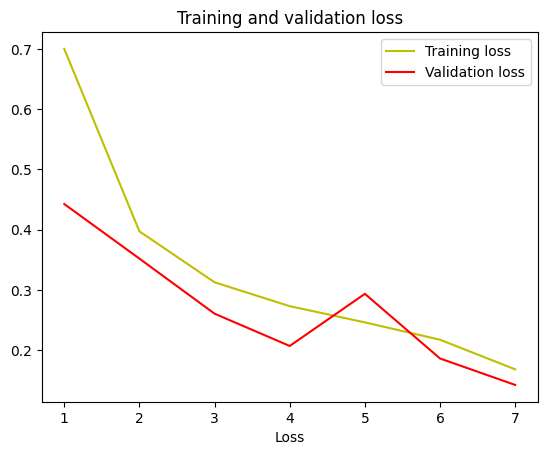

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

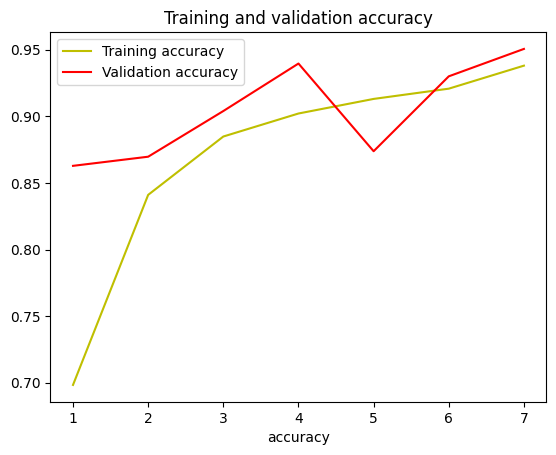

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [ ]:
class_name = ["early blight", "healthy", "late blight"]

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Early blight", "early blight",  class_name)

1/1 [==============================] - 1s 929ms/step
[9.9999976e-01 8.8819986e-11 2.1063387e-07]
Predicted class: early blight
1/1 [==============================] - 0s 293ms/step
[9.47919190e-01 1.27452295e-05 5.20680547e-02]
Predicted class: early blight
1/1 [==============================] - 0s 236ms/step
[8.8326305e-01 7.8021496e-04 1.1595672e-01]
Predicted class: early blight
1/1 [==============================] - 0s 143ms/step
[9.9999964e-01 1.8075895e-07 7.9805446e-08]
Predicted class: early blight
1/1 [==============================] - 0s 68ms/step
[9.9999774e-01 2.1694352e-06 7.0221631e-08]
Predicted class: early blight
1/1 [==============================] - 0s 91ms/step
[9.9999964e-01 1.1825289e-08 3.2278052e-07]
Predicted class: early blight
1/1 [==============================] - 0s 130ms/step
[9.8857224e-01 4.6949623e-07 1.1427223e-02]
Predicted class: early blight
1/1 [==============================] - 0s 114ms/step
[9.999993e-01 7.780810e-10 6.829261e-07]
Predicted class:

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Healthy", "healthy",  class_name)

1/1 [==============================] - 0s 282ms/step
[4.8234719e-15 1.0000000e+00 1.6930105e-15]
Predicted class: healthy
1/1 [==============================] - 0s 63ms/step
[7.5486787e-07 9.9998426e-01 1.5010401e-05]
Predicted class: healthy
1/1 [==============================] - 0s 189ms/step
[2.0670324e-08 9.9999988e-01 8.0229448e-08]
Predicted class: healthy
1/1 [==============================] - 0s 70ms/step
[1.0620515e-08 9.9999917e-01 8.4045973e-07]
Predicted class: healthy
1/1 [==============================] - 0s 68ms/step
[3.1551416e-04 9.9930871e-01 3.7570656e-04]
Predicted class: healthy
1/1 [==============================] - 0s 71ms/step
[4.2778955e-14 1.0000000e+00 2.8394709e-14]
Predicted class: healthy
1/1 [==============================] - 0s 86ms/step
[6.57966157e-05 9.99823868e-01 1.10324756e-04]
Predicted class: healthy
1/1 [==============================] - 0s 60ms/step
[2.9089090e-14 1.0000000e+00 1.4642377e-14]
Predicted class: healthy
1/1 [======================

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Late blight", "late blight",  class_name)

1/1 [==============================] - 0s 104ms/step
[3.0499461e-04 9.7061735e-01 2.9077636e-02]
Predicted class: healthy
1/1 [==============================] - 0s 81ms/step
[0.02074496 0.00186234 0.97739273]
Predicted class: late blight
1/1 [==============================] - 0s 232ms/step
[3.1667483e-07 1.6474556e-03 9.9835229e-01]
Predicted class: late blight
1/1 [==============================] - 0s 83ms/step
[1.5655873e-04 1.9068510e-04 9.9965274e-01]
Predicted class: late blight
1/1 [==============================] - 0s 92ms/step
[5.3463757e-01 6.8140966e-05 4.6529424e-01]
Predicted class: early blight
1/1 [==============================] - 0s 99ms/step
[4.3528028e-02 1.2336005e-04 9.5634860e-01]
Predicted class: late blight
1/1 [==============================] - 0s 78ms/step
[6.8734144e-04 7.0072251e-06 9.9930561e-01]
Predicted class: late blight
1/1 [==============================] - 0s 93ms/step
[2.0200431e-01 6.7672845e-05 7.9792804e-01]
Predicted class: late blight
1/1 [=====

# Model Apple

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

# load the images from the directories
train_data = datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Apple/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

testing_data = testing_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Apple/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

  # Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Apple/valid',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 8223 images belonging to 4 classes.
Found 1024 images belonging to 4 classes.
Found 1024 images belonging to 4 classes.


In [ ]:
def create_model_apple():

  ### START CODE HERE       

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
  ])
  

  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
# Save your model
model = create_model_apple()
callbacks = myCallback()

# Train your model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=testing_data,
                    callbacks=[callbacks])

Epoch 1/15
257/257 [==============================] - 1061s 4s/step - loss: 0.8406 - accuracy: 0.6522 - val_loss: 0.5250 - val_accuracy: 0.8115
Epoch 2/15
257/257 [==============================] - 886s 3s/step - loss: 0.4638 - accuracy: 0.8261 - val_loss: 0.3915 - val_accuracy: 0.8555
Epoch 3/15
257/257 [==============================] - 907s 4s/step - loss: 0.3852 - accuracy: 0.8592 - val_loss: 0.3432 - val_accuracy: 0.8672
Epoch 4/15
257/257 [==============================] - 869s 3s/step - loss: 0.3386 - accuracy: 0.8783 - val_loss: 0.4991 - val_accuracy: 0.8086
Epoch 5/15
257/257 [==============================] - 885s 3s/step - loss: 0.2923 - accuracy: 0.8936 - val_loss: 0.2182 - val_accuracy: 0.9189
Epoch 6/15
257/257 [==============================] - 914s 4s/step - loss: 0.2458 - accuracy: 0.9116 - val_loss: 0.2105 - val_accuracy: 0.9268
Epoch 7/15
257/257 [==============================] - 931s 4s/step - loss: 0.2349 - accuracy: 0.9138 - val_loss: 0.1923 - val_accuracy: 0.924

In [ ]:
model.save('model_apple.h5')

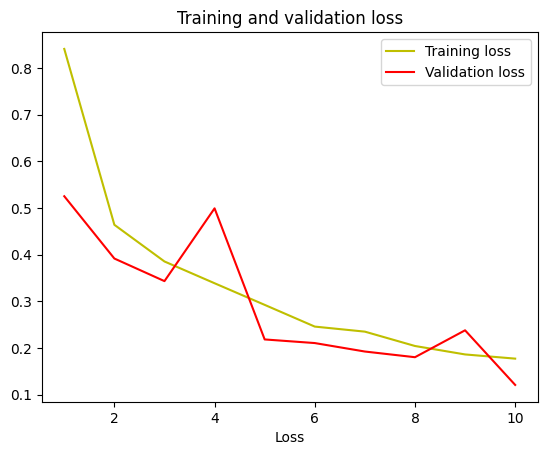

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

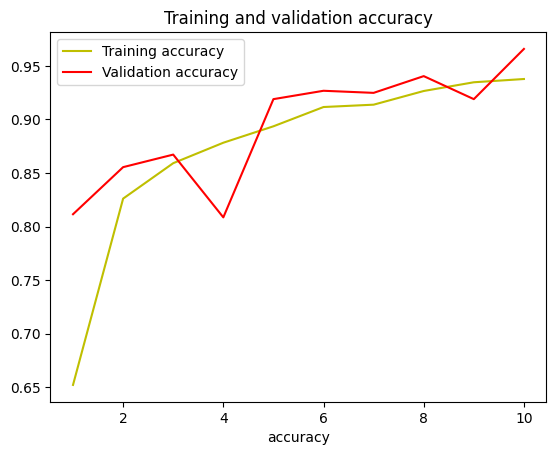

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [ ]:
class_name = ['black rot', 'healthy', 'scab', 'cedar rust']

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Apple/valid/Apple Black rot", "black rot",  class_name)

1/1 [==============================] - 0s 286ms/step
[0.6600205  0.06419625 0.02899992 0.24678335]
Predicted class: black rot
1/1 [==============================] - 0s 145ms/step
[9.9961334e-01 1.6388489e-04 1.2665322e-04 9.6195050e-05]
Predicted class: black rot
1/1 [==============================] - 0s 181ms/step
[9.9999857e-01 1.4748028e-06 2.7668619e-08 6.7380679e-10]
Predicted class: black rot
1/1 [==============================] - 0s 82ms/step
[9.9965727e-01 3.1551917e-04 2.6016531e-05 1.2255415e-06]
Predicted class: black rot
1/1 [==============================] - 0s 78ms/step
[1.0000000e+00 4.0229393e-09 1.2356736e-08 2.3322175e-10]
Predicted class: black rot
1/1 [==============================] - 0s 80ms/step
[9.9999523e-01 2.9055079e-06 1.8772791e-06 5.8205192e-08]
Predicted class: black rot
1/1 [==============================] - 0s 80ms/step
[9.9999440e-01 8.1098428e-08 5.4479428e-06 2.2550597e-09]
Predicted class: black rot
1/1 [==============================] - 0s 85ms/ste

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Apple/valid/Apple Healthy", "healthy",  class_name)

1/1 [==============================] - 0s 123ms/step
[1.3833406e-06 9.9999857e-01 5.0301174e-10 1.7307958e-10]
Predicted class: healthy
1/1 [==============================] - 0s 314ms/step
[3.2621259e-07 9.9999821e-01 1.3308108e-06 7.8418353e-08]
Predicted class: healthy
1/1 [==============================] - 0s 139ms/step
[8.7940989e-06 9.9981815e-01 1.6576103e-04 7.3075489e-06]
Predicted class: healthy
1/1 [==============================] - 0s 81ms/step
[3.3190710e-05 9.9945039e-01 5.1123294e-04 5.1093166e-06]
Predicted class: healthy
1/1 [==============================] - 0s 73ms/step
[1.0763745e-05 9.9998403e-01 4.6259561e-06 6.1808538e-07]
Predicted class: healthy
1/1 [==============================] - 0s 70ms/step
[1.2448909e-03 9.9875140e-01 3.0527237e-06 6.4970959e-07]
Predicted class: healthy
1/1 [==============================] - 0s 89ms/step
[2.2598929e-06 9.9969625e-01 2.9963683e-04 1.8839985e-06]
Predicted class: healthy
1/1 [==============================] - 0s 99ms/step


In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Apple/valid/Apple Scab", "scab",  class_name)

1/1 [==============================] - 0s 83ms/step
[2.7576953e-03 3.7439037e-02 9.5971626e-01 8.7035834e-05]
Predicted class: scab
1/1 [==============================] - 0s 69ms/step
[1.1103465e-06 2.9748374e-01 7.0251507e-01 5.5369433e-08]
Predicted class: scab
1/1 [==============================] - 0s 113ms/step
[9.4592379e-04 6.6081709e-01 3.3822718e-01 9.7504262e-06]
Predicted class: healthy
1/1 [==============================] - 0s 68ms/step
[2.5310749e-04 3.0098237e-02 9.6963543e-01 1.3121686e-05]
Predicted class: scab
1/1 [==============================] - 0s 79ms/step
[1.2688296e-03 5.8524677e-04 9.9789906e-01 2.4686486e-04]
Predicted class: scab
1/1 [==============================] - 0s 126ms/step
[3.8909340e-01 6.7585292e-03 6.0388499e-01 2.6315026e-04]
Predicted class: scab
1/1 [==============================] - 0s 95ms/step
[9.3367137e-03 4.7059506e-02 9.4279975e-01 8.0405676e-04]
Predicted class: scab
1/1 [==============================] - 0s 89ms/step
[1.5145295e-05 8.47

In [ ]:
predict_images("/content/drive/Shareddrives/Dataset Tanaman/Apple/valid/Cedar apple rust", "cedar rust",  class_name)

1/1 [==============================] - 0s 212ms/step
[3.5703360e-04 3.2923982e-01 1.9859735e-02 6.5054333e-01]
Predicted class: cedar rust
1/1 [==============================] - 0s 101ms/step
[0.00172443 0.05590789 0.03782899 0.90453875]
Predicted class: cedar rust
1/1 [==============================] - 0s 171ms/step
[4.3473167e-09 1.0482231e-05 5.7330599e-05 9.9993217e-01]
Predicted class: cedar rust
1/1 [==============================] - 0s 73ms/step
[6.3597620e-11 9.0773142e-07 2.3912335e-05 9.9997520e-01]
Predicted class: cedar rust
1/1 [==============================] - 0s 76ms/step
[3.6265050e-08 1.6111784e-05 3.2883370e-05 9.9995100e-01]
Predicted class: cedar rust
1/1 [==============================] - 0s 94ms/step
[2.8082137e-05 5.9230143e-04 1.2123908e-03 9.9816716e-01]
Predicted class: cedar rust
1/1 [==============================] - 0s 82ms/step
[1.4565645e-04 1.3895774e-03 1.0923032e-03 9.9737251e-01]
Predicted class: cedar rust
1/1 [==============================] - 0s 8

# Model tomat

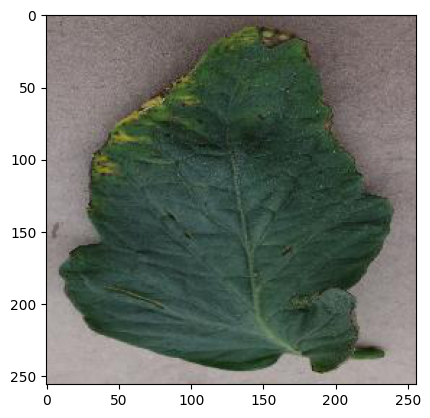

[[[130. 119. 117.]
  [132. 121. 119.]
  [139. 128. 126.]
  ...
  [142. 128. 127.]
  [126. 112. 111.]
  [129. 115. 114.]]

 [[138. 127. 125.]
  [135. 124. 122.]
  [134. 123. 121.]
  ...
  [130. 116. 115.]
  [121. 107. 106.]
  [127. 113. 112.]]

 [[140. 129. 127.]
  [137. 126. 124.]
  [134. 123. 121.]
  ...
  [129. 115. 114.]
  [130. 116. 115.]
  [138. 124. 123.]]

 ...

 [[175. 165. 164.]
  [172. 162. 161.]
  [173. 163. 162.]
  ...
  [182. 172. 171.]
  [182. 172. 171.]
  [182. 172. 171.]]

 [[179. 169. 168.]
  [175. 165. 164.]
  [175. 165. 164.]
  ...
  [181. 171. 170.]
  [181. 171. 170.]
  [181. 171. 170.]]

 [[182. 172. 171.]
  [177. 167. 166.]
  [177. 167. 166.]
  ...
  [178. 168. 167.]
  [178. 168. 167.]
  [178. 168. 167.]]]
Each image has shape: (256, 256, 3)
The maximum pixel value used is: 196.0
Each image has shape: (67500,)
The maximum pixel value used is: 190.1953582763672
[132.90912 121.90911 119.90911 ... 179.06    169.06    168.06   ]
(67500,)


In [ ]:
analyze_image("/content/drive/Shareddrives/Dataset Tanaman/Tomato/train/Tomato Bacterial spot")

In [ ]:
# create an ImageDataGenerator object to load the images from directories
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# load the images from the directories
train_data = datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Tomato/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/Tomato/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 33455 images belonging to 10 classes.
Found 8348 images belonging to 10 classes.


In [ ]:
def create_model_tomato():

  ### START CODE HERE       

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 10 classes
    tf.keras.layers.Dense(10, activation='softmax')
  ])
  

  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
# Save your model
model = create_model_tomato()
callbacks = myCallback()

# Train your model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/15
1046/1046 [==============================] - 11190s 11s/step - loss: 0.7150 - accuracy: 0.7528 - val_loss: 0.3823 - val_accuracy: 0.8778
Epoch 2/15
1046/1046 [==============================] - 2294s 2s/step - loss: 0.2560 - accuracy: 0.9160 - val_loss: 0.2671 - val_accuracy: 0.9148
Epoch 3/15
1046/1046 [==============================] - 2178s 2s/step - loss: 0.1528 - accuracy: 0.9484 - val_loss: 0.1960 - val_accuracy: 0.9384
Epoch 4/15
1046/1046 [==============================] - 2177s 2s/step - loss: 0.1094 - accuracy: 0.9639 - val_loss: 0.1767 - val_accuracy: 0.9487
Epoch 5/15
1046/1046 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.9712
Reached above 90% accuracy and under 10% loss so cancelling training!
1046/1046 [==============================] - 2150s 2s/step - loss: 0.0896 - accuracy: 0.9712 - val_loss: 0.1951 - val_accuracy: 0.9472


In [ ]:
model.save('model_tomato.h5')

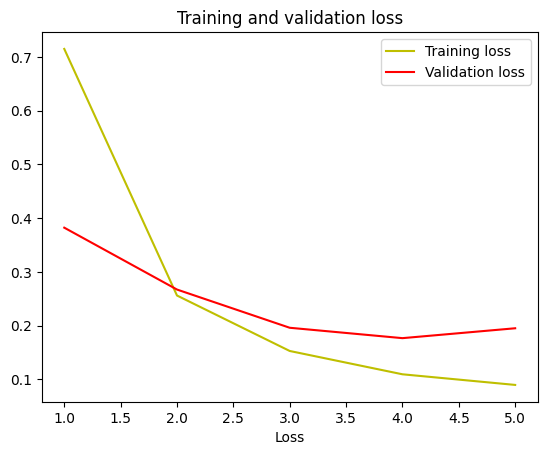

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

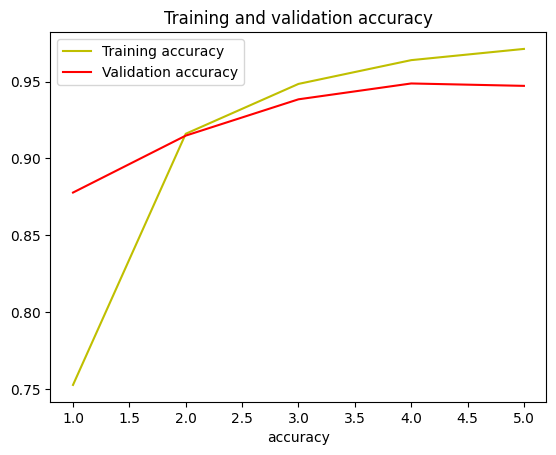

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [ ]:
images = os.listdir('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Bacterial spot')

print(images)

class_name = ["bacterial spot", "early blight", "healthy", "late blight", 
              "leaf mold", "mosaic virus", "septoria leaf spot",
              "spider mites", "target spot", "yellow leaf curl virus"]

for i in images:
 print()
 # predicting images
 path = '/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Bacterial spot/' + i
 img = load_img(path, target_size=(150, 150))
 x = img_to_array(img)
 x /= 255
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)

 
 print(classes[0])

 # Get the index of the class with the highest probability
 predicted_class_index = np.argmax(classes[0])

# Get the name of the predicted class
 predicted_class_name = class_name[predicted_class_index]

# Print the predicted class name
 print("Predicted class:", predicted_class_name)

['TomatoBacterialSpot(1).jpg', 'TomatoBacterialSpot(11).JPG', 'TomatoBacterialSpot(7).jpg', 'TomatoBacterialSpot(3).jpg', 'TomatoBacterialSpot(8).jpg', 'TomatoBacterialSpot(6).jpg', 'TomatoBacterialSpot(9).jpg', 'TomatoBacterialSpot(10).JPG', 'TomatoBacterialSpot(5).jpg', 'TomatoBacterialSpot(4).jpg', 'TomatoBacterialSpot(2).jpg']

1/1 [==============================] - 0s 431ms/step
[1.7896002e-04 8.1586355e-04 4.0981270e-02 1.3128531e-01 4.2188596e-03
 1.4267952e-04 8.0903906e-01 9.8557871e-07 2.6410112e-06 1.3334346e-02]
Predicted class: septoria leaf spot

1/1 [==============================] - 0s 46ms/step
[5.6862546e-04 8.5920538e-04 9.2337001e-04 9.4461650e-01 5.1381029e-02
 1.0693948e-04 1.4098684e-03 1.2644282e-06 3.0241301e-06 1.3022361e-04]
Predicted class: late blight

1/1 [==============================] - 0s 47ms/step
[0.07456459 0.17593764 0.09127657 0.10360515 0.28433827 0.09414724
 0.10756212 0.00076541 0.00297169 0.06483138]
Predicted class: leaf mold

1/1 [==========

In [ ]:
# create an ImageDataGenerator object to load the images from directories
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

# load the images from the directories
train_data = datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/type/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

testing_data = testing_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/type/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate the image by 20 degrees
    width_shift_range=0.2,  # Shift the image horizontally by 20% of the width
    height_shift_range=0.2, # Shift the image vertically by 20% of the height
    shear_range=0.2,        # Shear the image by 20 degrees
    zoom_range=0.2,         # Zoom in on the image by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill any pixels that are lost during the transformation with the nearest pixel value
    )

  # Pass in the appropriate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/drive/Shareddrives/Dataset Tanaman/type/valid',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 11000 images belonging to 3 classes.
Found 1375 images belonging to 3 classes.
Found 1375 images belonging to 3 classes.


In [ ]:
def create_model_type():

  ### START CODE HERE       

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 3 classes
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  

  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
# Save your model
model = create_model_type()
callbacks = myCallback()

# Train your model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=testing_data,
                    callbacks=[callbacks])

Epoch 1/15
344/344 [==============================] - 3802s 11s/step - loss: 0.6313 - accuracy: 0.7250 - val_loss: 0.3507 - val_accuracy: 0.8735
Epoch 2/15
344/344 [==============================] - 1197s 3s/step - loss: 0.3566 - accuracy: 0.8598 - val_loss: 0.3058 - val_accuracy: 0.8735
Epoch 3/15
344/344 [==============================] - 1147s 3s/step - loss: 0.2770 - accuracy: 0.8940 - val_loss: 0.2742 - val_accuracy: 0.8960
Epoch 4/15
344/344 [==============================] - 1194s 3s/step - loss: 0.2422 - accuracy: 0.9109 - val_loss: 0.2803 - val_accuracy: 0.8916
Epoch 5/15
344/344 [==============================] - 1149s 3s/step - loss: 0.2406 - accuracy: 0.9099 - val_loss: 0.1777 - val_accuracy: 0.9331
Epoch 6/15
344/344 [==============================] - 1137s 3s/step - loss: 0.2082 - accuracy: 0.9239 - val_loss: 0.1685 - val_accuracy: 0.9382
Epoch 7/15
344/344 [==============================] - 1140s 3s/step - loss: 0.1939 - accuracy: 0.9255 - val_loss: 0.2525 - val_accuracy

In [ ]:
model.save('model_type.h5')

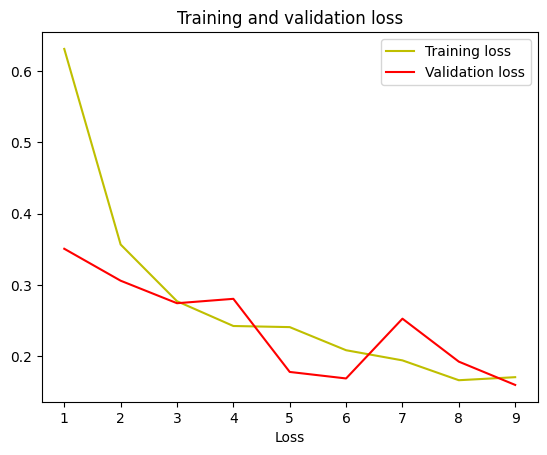

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

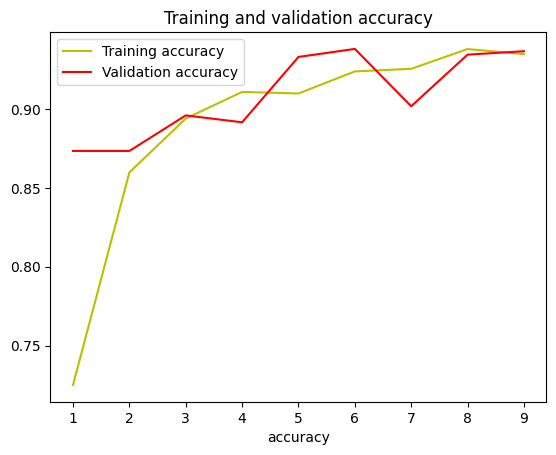

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_images(directory, name, class_name) :
    images = os.listdir(directory)

    size = len(images)

    count = 0


    for i in images:
    # predicting images
        path = directory + "/" + i
        img = load_img(path, target_size=(150, 150))
        x = img_to_array(img)
        x /= 255
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)

        
        print(classes[0])

        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(classes[0])

        # Get the name of the predicted class
        predicted_class_name = class_name[predicted_class_index]

        if predicted_class_name == name : 
            count += 1

        # Print the predicted class name
        print("Predicted class:", predicted_class_name)
    
    percentage = count/size * 100

    print("percentage : " + str(percentage))

In [ ]:

class_name = ["apple", "corn", "potato",]

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/type/valid/Corn', "corn", class_name)

1/1 [==============================] - 0s 220ms/step
[9.5661228e-05 9.9873370e-01 1.1707158e-03]
Predicted class: corn
1/1 [==============================] - 0s 56ms/step
[0.00180744 0.9855801  0.01261251]
Predicted class: corn
1/1 [==============================] - 0s 55ms/step
[3.0768726e-06 9.9988568e-01 1.1119851e-04]
Predicted class: corn
1/1 [==============================] - 0s 56ms/step
[5.6667035e-05 9.9888724e-01 1.0560744e-03]
Predicted class: corn
1/1 [==============================] - 0s 56ms/step
[2.0776643e-07 9.9999428e-01 5.4403049e-06]
Predicted class: corn
1/1 [==============================] - 0s 139ms/step
[1.2549233e-06 9.9993515e-01 6.3592903e-05]
Predicted class: corn
1/1 [==============================] - 0s 58ms/step
[4.0857089e-05 9.9963808e-01 3.2098487e-04]
Predicted class: corn
1/1 [==============================] - 0s 59ms/step
[1.5449623e-05 9.9993396e-01 5.0510858e-05]
Predicted class: corn
1/1 [==============================] - 0s 54ms/step
[0.00232901

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/type/valid/Potato', "potato", class_name)

1/1 [==============================] - 0s 72ms/step
[1.3939563e-06 6.7832286e-09 9.9999857e-01]
Predicted class: potato
1/1 [==============================] - 0s 76ms/step
[1.2463058e-06 7.8708604e-09 9.9999869e-01]
Predicted class: potato
1/1 [==============================] - 0s 58ms/step
[3.088500e-05 4.417779e-08 9.999691e-01]
Predicted class: potato
1/1 [==============================] - 1s 859ms/step
[3.3881581e-06 1.2908920e-07 9.9999642e-01]
Predicted class: potato
1/1 [==============================] - 0s 81ms/step
[7.1718486e-04 3.9876426e-07 9.9928242e-01]
Predicted class: potato
1/1 [==============================] - 0s 97ms/step
[1.5252705e-05 8.7911019e-08 9.9998462e-01]
Predicted class: potato
1/1 [==============================] - 0s 94ms/step
[1.3206277e-05 3.5406512e-08 9.9998677e-01]
Predicted class: potato
1/1 [==============================] - 0s 82ms/step
[6.7949281e-06 2.8812613e-08 9.9999321e-01]
Predicted class: potato
1/1 [==============================] - 0s 

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/type/valid/Apple', "apple", class_name)

1/1 [==============================] - 0s 229ms/step
[9.9833846e-01 6.1259243e-06 1.6554721e-03]
Predicted class: apple
1/1 [==============================] - 0s 91ms/step
[9.999894e-01 7.764900e-10 1.057640e-05]
Predicted class: apple
1/1 [==============================] - 0s 81ms/step
[9.8570651e-01 2.6369587e-06 1.4290895e-02]
Predicted class: apple
1/1 [==============================] - 0s 81ms/step
[0.67846876 0.03080117 0.29073006]
Predicted class: apple
1/1 [==============================] - 0s 58ms/step
[9.99891639e-01 8.15893827e-07 1.07474836e-04]
Predicted class: apple
1/1 [==============================] - 0s 58ms/step
[9.999982e-01 7.132804e-08 1.677914e-06]
Predicted class: apple
1/1 [==============================] - 0s 60ms/step
[9.9993598e-01 2.2980446e-06 6.1747131e-05]
Predicted class: apple
1/1 [==============================] - 0s 71ms/step
[9.9999034e-01 6.3918204e-10 9.6084095e-06]
Predicted class: apple
1/1 [==============================] - 0s 59ms/step
[9.9999

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Common rust', "corn", class_name)

1/1 [==============================] - 0s 145ms/step
[6.8159105e-05 8.1583714e-01 1.8409468e-01]
Predicted class: potato
1/1 [==============================] - 0s 55ms/step
[0.65299547 0.13297334 0.21403117]
Predicted class: corn
1/1 [==============================] - 0s 59ms/step
[9.9999750e-01 4.9505439e-07 2.0074558e-06]
Predicted class: corn
1/1 [==============================] - 0s 60ms/step
[0.9879227  0.00349139 0.00858586]
Predicted class: corn
1/1 [==============================] - 0s 54ms/step
[4.2111028e-04 9.9613804e-01 3.4408621e-03]
Predicted class: potato
1/1 [==============================] - 0s 59ms/step
[9.5842552e-04 9.8781294e-01 1.1228631e-02]
Predicted class: potato
1/1 [==============================] - 0s 62ms/step
[9.998354e-01 6.821913e-05 9.639000e-05]
Predicted class: corn
1/1 [==============================] - 0s 53ms/step
[2.7755174e-05 1.8000592e-01 8.1996632e-01]
Predicted class: tomato
1/1 [==============================] - 0s 54ms/step
[1.6088462e-04 4

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Gray leaf spot', "corn", class_name)

1/1 [==============================] - 0s 53ms/step
[2.1325033e-05 2.0016057e-03 9.9797708e-01]
Predicted class: tomato
1/1 [==============================] - 0s 52ms/step
[0.00122081 0.9896153  0.00916391]
Predicted class: potato
1/1 [==============================] - 0s 52ms/step
[0.18028831 0.81083447 0.00887728]
Predicted class: potato
1/1 [==============================] - 0s 54ms/step
[0.00231693 0.68776256 0.3099205 ]
Predicted class: potato
1/1 [==============================] - 0s 53ms/step
[0.98380566 0.01271711 0.00347724]
Predicted class: corn
1/1 [==============================] - 0s 51ms/step
[9.9999964e-01 7.5752219e-08 2.4404611e-07]
Predicted class: corn
percentage : 33.33333333333333


In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Healthy', "corn", class_name)

1/1 [==============================] - 0s 57ms/step
[9.9809164e-01 1.0368474e-03 8.7149080e-04]
Predicted class: corn
1/1 [==============================] - 0s 55ms/step
[9.9855965e-01 9.2392846e-04 5.1635230e-04]
Predicted class: corn
percentage : 100.0


In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Corn/valid/Corn Northern Leaf Blight', "corn", class_name)

1/1 [==============================] - 0s 65ms/step
[9.9999988e-01 5.0084260e-08 1.1820574e-07]
Predicted class: corn
1/1 [==============================] - 0s 61ms/step
[2.731202e-05 8.947388e-03 9.910253e-01]
Predicted class: tomato
1/1 [==============================] - 0s 79ms/step
[9.9999988e-01 5.6496830e-08 1.3345185e-07]
Predicted class: corn
1/1 [==============================] - 0s 79ms/step
[6.851668e-04 9.910527e-01 8.262226e-03]
Predicted class: potato
1/1 [==============================] - 0s 76ms/step
[5.7476314e-05 8.1678405e-02 9.1826409e-01]
Predicted class: tomato
1/1 [==============================] - 0s 80ms/step
[1.4436635e-04 2.4056108e-01 7.5929457e-01]
Predicted class: tomato
1/1 [==============================] - 0s 76ms/step
[9.9993002e-01 2.9106863e-05 4.0900759e-05]
Predicted class: corn
1/1 [==============================] - 0s 103ms/step
[7.1170274e-04 9.7590315e-01 2.3385054e-02]
Predicted class: potato
1/1 [==============================] - 0s 53ms/step

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Early blight', "potato", class_name)

1/1 [==============================] - 0s 88ms/step
[9.2008064e-05 6.7867160e-01 3.2123646e-01]
Predicted class: potato
1/1 [==============================] - 0s 78ms/step
[7.2308903e-04 9.8310339e-01 1.6173543e-02]
Predicted class: potato
1/1 [==============================] - 0s 52ms/step
[0.7254182  0.24824584 0.02633596]
Predicted class: corn
1/1 [==============================] - 0s 54ms/step
[9.728513e-09 6.468468e-03 9.935315e-01]
Predicted class: tomato
1/1 [==============================] - 0s 55ms/step
[3.9666594e-09 8.3462146e-06 9.9999166e-01]
Predicted class: tomato
1/1 [==============================] - 0s 53ms/step
[1.2325209e-07 9.8024565e-01 1.9754186e-02]
Predicted class: potato
1/1 [==============================] - 0s 54ms/step
[8.9672245e-12 2.3191635e-07 9.9999976e-01]
Predicted class: tomato
1/1 [==============================] - 0s 52ms/step
[2.4380487e-10 2.2747503e-05 9.9997723e-01]
Predicted class: tomato
1/1 [==============================] - 0s 51ms/step
[1

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Healthy', "potato", class_name)

1/1 [==============================] - 0s 79ms/step
[1.3929939e-07 9.9974900e-01 2.5087656e-04]
Predicted class: potato
1/1 [==============================] - 0s 89ms/step
[3.3240008e-07 9.9936587e-01 6.3375605e-04]
Predicted class: potato
percentage : 100.0


In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Potato/valid/Potato Late blight', "potato", class_name)

1/1 [==============================] - 0s 76ms/step
[0.00892216 0.9840598  0.00701803]
Predicted class: potato
1/1 [==============================] - 0s 79ms/step
[7.5247852e-05 9.9928802e-01 6.3672534e-04]
Predicted class: potato
1/1 [==============================] - 0s 78ms/step
[2.6535312e-05 9.9901140e-01 9.6201606e-04]
Predicted class: potato
1/1 [==============================] - 0s 57ms/step
[0.9896958  0.00665555 0.00364866]
Predicted class: corn
1/1 [==============================] - 0s 63ms/step
[1.4500765e-05 9.9936754e-01 6.1795482e-04]
Predicted class: potato
1/1 [==============================] - 0s 56ms/step
[2.3619788e-09 3.1315602e-04 9.9968684e-01]
Predicted class: tomato
1/1 [==============================] - 0s 56ms/step
[2.0100022e-04 3.7504268e-01 6.2475634e-01]
Predicted class: tomato
1/1 [==============================] - 0s 53ms/step
[2.2739039e-05 9.3617725e-01 6.3799910e-02]
Predicted class: potato
1/1 [==============================] - 0s 51ms/step
[0.86735

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Bacterial spot', "tomato", class_name)

1/1 [==============================] - 0s 222ms/step
[1.8399472e-16 1.6069650e-09 1.0000000e+00]
Predicted class: tomato
1/1 [==============================] - 0s 116ms/step
[6.49810161e-08 1.43577945e-05 9.99985576e-01]
Predicted class: tomato
1/1 [==============================] - 0s 56ms/step
[2.2161310e-06 3.5209352e-01 6.4790422e-01]
Predicted class: tomato
1/1 [==============================] - 0s 57ms/step
[5.2762528e-07 8.7679350e-01 1.2320593e-01]
Predicted class: potato
1/1 [==============================] - 0s 56ms/step
[9.9971777e-01 1.5992942e-04 1.2228057e-04]
Predicted class: corn
1/1 [==============================] - 0s 60ms/step
[9.5721924e-01 4.1927766e-02 8.5291441e-04]
Predicted class: corn
1/1 [==============================] - 0s 54ms/step
[1.8442074e-14 5.4199578e-08 1.0000000e+00]
Predicted class: tomato
1/1 [==============================] - 0s 57ms/step
[0.35338983 0.6260301  0.02058004]
Predicted class: potato
1/1 [==============================] - 0s 66ms/s

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Early blight', "tomato", class_name)

1/1 [==============================] - 0s 57ms/step
[2.3604763e-07 9.9990487e-01 9.4908901e-05]
Predicted class: potato
1/1 [==============================] - 0s 52ms/step
[7.9578228e-07 2.8580692e-04 9.9971336e-01]
Predicted class: tomato
1/1 [==============================] - 0s 54ms/step
[1.14515096e-04 1.57751709e-01 8.42133760e-01]
Predicted class: tomato
1/1 [==============================] - 0s 52ms/step
[4.5429589e-09 4.7777576e-04 9.9952221e-01]
Predicted class: tomato
1/1 [==============================] - 0s 50ms/step
[1.25695515e-05 9.21135902e-01 7.88514987e-02]
Predicted class: potato
1/1 [==============================] - 0s 53ms/step
[2.4417873e-06 2.4669943e-04 9.9975091e-01]
Predicted class: tomato
1/1 [==============================] - 0s 52ms/step
[9.8591526e-12 1.2994451e-07 9.9999988e-01]
Predicted class: tomato
1/1 [==============================] - 0s 54ms/step
[1.0629126e-04 9.9153006e-01 8.3636576e-03]
Predicted class: potato
1/1 [=============================

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Healthy', "tomato", class_name)

1/1 [==============================] - 0s 77ms/step
[1.2043606e-12 8.1033164e-08 9.9999988e-01]
Predicted class: tomato
1/1 [==============================] - 0s 62ms/step
[9.9998868e-01 3.3983383e-06 7.8895446e-06]
Predicted class: corn
1/1 [==============================] - 0s 56ms/step
[1.7693374e-06 9.9974447e-01 2.5374821e-04]
Predicted class: potato
1/1 [==============================] - 0s 53ms/step
[2.2403910e-04 9.9091995e-01 8.8560274e-03]
Predicted class: potato
1/1 [==============================] - 0s 58ms/step
[1.0986805e-08 9.9999964e-01 3.0223399e-07]
Predicted class: potato
1/1 [==============================] - 0s 52ms/step
[3.0020918e-04 9.9405009e-01 5.6497431e-03]
Predicted class: potato
1/1 [==============================] - 0s 54ms/step
[7.7917146e-18 4.5512417e-11 1.0000000e+00]
Predicted class: tomato
1/1 [==============================] - 0s 53ms/step
[2.1483585e-08 5.6551726e-05 9.9994338e-01]
Predicted class: tomato
1/1 [==============================] - 0s 

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Late blight', "tomato", class_name)

1/1 [==============================] - 0s 55ms/step
[9.9999940e-01 1.7045564e-07 4.8686968e-07]
Predicted class: corn
1/1 [==============================] - 0s 56ms/step
[0.00521936 0.97110593 0.02367475]
Predicted class: potato
1/1 [==============================] - 0s 53ms/step
[0.00280773 0.09094848 0.90624386]
Predicted class: tomato
1/1 [==============================] - 0s 53ms/step
[0.46993816 0.5136764  0.01638541]
Predicted class: potato
1/1 [==============================] - 0s 66ms/step
[4.5641295e-06 8.8731205e-04 9.9910814e-01]
Predicted class: tomato
1/1 [==============================] - 0s 55ms/step
[6.8605618e-07 2.0119838e-01 7.9880095e-01]
Predicted class: tomato
1/1 [==============================] - 0s 56ms/step
[0.01817186 0.2696572  0.712171  ]
Predicted class: tomato
1/1 [==============================] - 0s 55ms/step
[0.8110263  0.16633146 0.02264219]
Predicted class: corn
1/1 [==============================] - 0s 52ms/step
[1.5447788e-04 5.4863531e-02 9.449819

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Leaf Mold', "tomato", class_name)

1/1 [==============================] - 0s 53ms/step
[9.9926418e-01 4.3113570e-04 3.0466783e-04]
Predicted class: corn
1/1 [==============================] - 0s 53ms/step
[5.8237656e-06 9.9983656e-01 1.5752544e-04]
Predicted class: potato
1/1 [==============================] - 0s 67ms/step
[8.0399723e-06 9.9974626e-01 2.4571351e-04]
Predicted class: potato
1/1 [==============================] - 0s 68ms/step
[9.0158384e-05 4.4702756e-01 5.5288231e-01]
Predicted class: tomato
1/1 [==============================] - 0s 56ms/step
[8.7108616e-05 7.2157758e-01 2.7833524e-01]
Predicted class: potato
1/1 [==============================] - 0s 58ms/step
[2.9316480e-12 2.3081422e-07 9.9999976e-01]
Predicted class: tomato
1/1 [==============================] - 0s 55ms/step
[3.9031920e-06 1.9507922e-03 9.9804533e-01]
Predicted class: tomato
1/1 [==============================] - 0s 72ms/step
[0.02008666 0.7257763  0.25413707]
Predicted class: potato
percentage : 37.5


In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Mosaic virus', "tomato", class_name)

1/1 [==============================] - 0s 61ms/step
[5.2971732e-06 9.9904221e-01 9.5246796e-04]
Predicted class: potato
1/1 [==============================] - 0s 66ms/step
[0.82406926 0.1671923  0.00873843]
Predicted class: corn
1/1 [==============================] - 0s 96ms/step
[5.85257134e-04 8.80106807e-01 1.19307965e-01]
Predicted class: potato
1/1 [==============================] - 0s 80ms/step
[0.00091226 0.89258194 0.10650593]
Predicted class: potato
1/1 [==============================] - 0s 79ms/step
[3.62862265e-05 1.18005695e-02 9.88163173e-01]
Predicted class: tomato
1/1 [==============================] - 0s 77ms/step
[0.2202741  0.76074815 0.01897768]
Predicted class: potato
1/1 [==============================] - 0s 76ms/step
[1.7863479e-07 9.9876815e-01 1.2316132e-03]
Predicted class: potato
1/1 [==============================] - 0s 74ms/step
[0.9795919  0.01372822 0.00667982]
Predicted class: corn
1/1 [==============================] - 0s 74ms/step
[0.02168703 0.9730301 

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Septoria leaf spot', "tomato", class_name)

1/1 [==============================] - 0s 161ms/step
[5.12124461e-06 9.85529363e-01 1.44654615e-02]
Predicted class: potato
1/1 [==============================] - 0s 79ms/step
[7.0438330e-12 9.9997962e-01 2.0361047e-05]
Predicted class: potato
1/1 [==============================] - 0s 77ms/step
[0.35839486 0.51719344 0.12441166]
Predicted class: potato
1/1 [==============================] - 0s 76ms/step
[1.4765706e-09 1.9253293e-04 9.9980754e-01]
Predicted class: tomato
1/1 [==============================] - 0s 68ms/step
[6.1963506e-06 9.9957317e-01 4.2068571e-04]
Predicted class: potato
1/1 [==============================] - 0s 54ms/step
[1.9334216e-06 9.9957877e-01 4.1927979e-04]
Predicted class: potato
1/1 [==============================] - 0s 57ms/step
[0.0027224  0.77228767 0.22498988]
Predicted class: potato
1/1 [==============================] - 0s 53ms/step
[0.05310678 0.91989326 0.0269999 ]
Predicted class: potato
1/1 [==============================] - 0s 56ms/step
[0.1698708 

In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Spider mites', "tomato", class_name)

1/1 [==============================] - 0s 59ms/step
[0.685459   0.14313187 0.17140907]
Predicted class: corn
1/1 [==============================] - 0s 53ms/step
[9.9989438e-01 3.6248533e-05 6.9366615e-05]
Predicted class: corn
percentage : 0.0


In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Target Spot', "tomato", class_name)

1/1 [==============================] - 0s 63ms/step
[0.00119161 0.89787364 0.10093471]
Predicted class: potato
1/1 [==============================] - 0s 59ms/step
[9.9999928e-01 7.9199474e-08 5.9009346e-07]
Predicted class: corn
percentage : 0.0


In [ ]:
predict_images('/content/drive/Shareddrives/Dataset Tanaman/Tomato/valid/Tomato Yellow Leaf Curl Virus', "tomato", class_name)

1/1 [==============================] - 0s 63ms/step
[0.7501293  0.20721895 0.04265176]
Predicted class: corn
1/1 [==============================] - 0s 95ms/step
[1.31832685e-05 1.21942088e-01 8.78044784e-01]
Predicted class: tomato
1/1 [==============================] - 0s 79ms/step
[1.5394050e-16 5.3089635e-09 1.0000000e+00]
Predicted class: tomato
1/1 [==============================] - 0s 76ms/step
[7.862092e-07 2.241048e-02 9.775888e-01]
Predicted class: tomato
1/1 [==============================] - 0s 74ms/step
[0.97113323 0.02299866 0.00586815]
Predicted class: corn
1/1 [==============================] - 0s 89ms/step
[3.7127291e-05 3.6682263e-02 9.6328062e-01]
Predicted class: tomato
1/1 [==============================] - 0s 78ms/step
[0.98530257 0.01040479 0.0042926 ]
Predicted class: corn
1/1 [==============================] - 0s 77ms/step
[3.5762950e-04 8.7210339e-01 1.2753898e-01]
Predicted class: potato
1/1 [==============================] - 0s 81ms/step
[5.2229880e-05 9.0027